# Querying CIA Factbook Data Using SQLite and Python

In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like: 

- population - The population as of 2015. 

- population_growth - The annual population growth rate, as a percentage. 

- area - The total land and water area. 

In this guided project, we'll explore the Python SQLite workflow to explore, analyze, and visualize data from this database. First things first, let's get familiar with the database. 

In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("factbook.db")

# getting the tables in the database
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
q1 = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q1, conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [3]:
q2 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;"
pd.read_sql_query(q2, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [4]:
q = "SELECT * FROM facts WHERE population=0;"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [5]:
q = "SELECT * FROM facts WHERE population=7256490011;"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


The row with the country name "Antartica" has a population of 0. We also see that the name with the country name "World" contains the value 7256490011 for the column population. We understand that this row represents the entire world itself, and not a single country.

In [6]:
q = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE ((name!='World') AND (name!='Antartica'));"
pd.read_sql_query(q, conn)

,population,population_growth,birth_rate,death_rate
0,32564342.0,2.32,38.57,13.89
1,3029278.0,0.30,12.92,6.58
2,39542166.0,1.84,23.67,4.31
3,85580.0,0.12,8.13,6.96
4,19625353.0,2.78,38.78,11.49
5,92436.0,1.24,15.85,5.69
6,43431886.0,0.93,16.64,7.33
7,3056382.0,0.15,13.61,9.34
8,22751014.0,1.07,12.15,7.14
9,8665550.0,0.55,9.41,9.42


## Data Visualization

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8865b3710>,
      dtype=object)

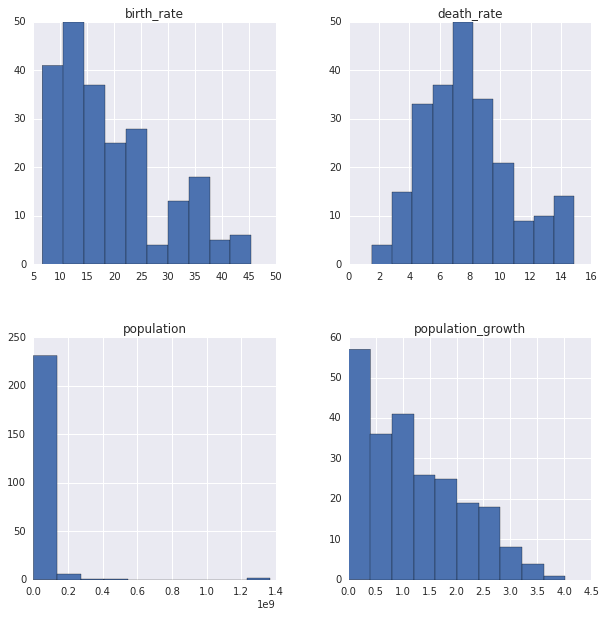

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
a = pd.read_sql_query(q, conn)
a.hist(ax=ax)

Countries with highest density

In [12]:
q = "SELECT name, CAST(population as float)/CAST(area_land as float) population_density FROM facts ORDER BY population_density DESC;"
pd.read_sql_query(q, conn)

,name,population_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926
